<a href="https://colab.research.google.com/github/hyunBBB/OMG/blob/main/09_dogs_and_cats_classifier_convnet_%EC%A0%95%EB%8B%B5(%EC%B5%9C%EC%A2%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
from google.colab import drive
drive.mount ('./MyDrive')

Mounted at ./MyDrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd drive/MyDrive/CV_exprt

/content/drive/MyDrive/CV_exprt


In [11]:
cd CNN

/content/drive/MyDrive/CV_exprt/CNN


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Read data

In [14]:
import pathlib

#dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = './dogsandcats' #tf.keras.utils.get_file('dogsandcats', origin=dataset_url, untar=True)
# . 이라는게 지금현재폴더라는 뜻이고 슬래쉬는 그 아래에 있다는 것임. 
data_dir = pathlib.Path(data_dir)

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

20


In [18]:
dogs = list(data_dir.glob('dogs/*'))
PIL.Image.open(str(dogs[1]))

IndexError: ignored

Make train **data** set

In [19]:
batch_size = 32
img_height = 180
img_width = 180

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  seed = 1,
  batch_size=batch_size)

Found 20 files belonging to 2 classes.
Using 16 files for training.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
   seed = 1,
  batch_size=batch_size)

Found 20 files belonging to 2 classes.
Using 4 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


Plot images

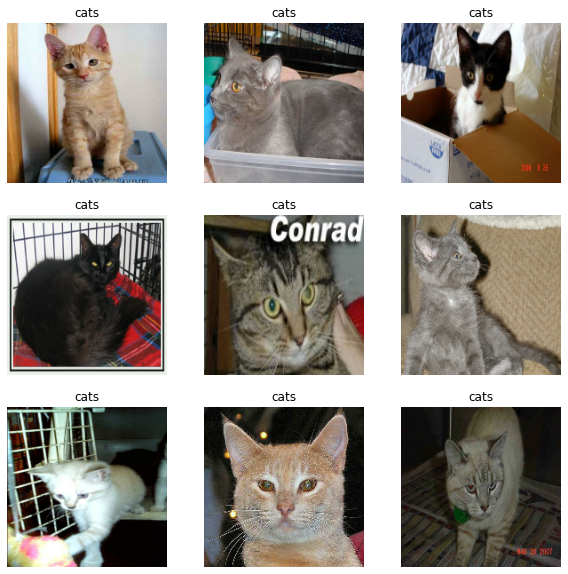

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height,  img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Create Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [24]:
num_classes = 2

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

NameError: ignored

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [25]:
#callback 설정
import datetime
# 1. tensorboard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# 2. checkpoint
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="./checkpoint",save_weights_only=True,monitor='val_accuracy',mode='max', save_best_only=True)

# 3. early stop
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


Training

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard_callback, checkpoint_callback,earlystop_callback ]
)

Epoch 1/10
23/23 [==============================] - 3s 125ms/step - loss: 0.0821 - accuracy: 0.9746 - val_loss: 1.2076 - val_accuracy: 0.6441
Epoch 2/10
23/23 [==============================] - 3s 127ms/step - loss: 0.0464 - accuracy: 0.9887 - val_loss: 1.6260 - val_accuracy: 0.6836
Epoch 3/10
23/23 [==============================] - 3s 119ms/step - loss: 0.0376 - accuracy: 0.9929 - val_loss: 1.6296 - val_accuracy: 0.6384
Epoch 4/10
23/23 [==============================] - 3s 130ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 1.8845 - val_accuracy: 0.6441


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Train Results

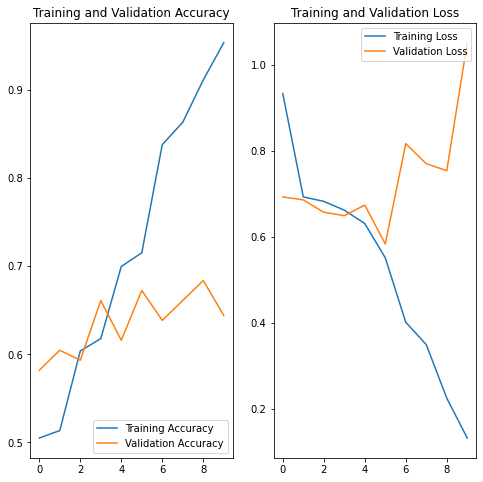

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
num_classes = 2

model2 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model2.load_weights('checkpoint')

NotFoundError: ignored

In [28]:
test_score = model2.evaluate(val_ds)

1/1 [==============================] - 12s 12s/step - loss: 0.6798 - accuracy: 0.7500
